In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.0,0.0,0.0,2,2,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0,0.0,3.0,0.0,3,0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3.0,0.0,2,0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,0.0,2.0,0.0,2,2,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,0.0,2.0,0.0,2,0,...,0.0,0,0.0,3,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0.0,0.0,0,0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0.0,0.0,0.0,3,2,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70
355,2,2,2,1,0,0.0,0.0,0.0,0,0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,0.0,0.0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	55
float64		column 7	18
float64		column 8	54
int64		column 9	0
int64		column 10	0
int64		column 11	0
float64		column 12	73
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
int64		column 17	0
int64		column 18	0
int64		column 19	0
int64		column 20	0
int64		column 21	0
float64		column 22	37
int64		column 23	0
int64		column 24	0
float64		column 25	73
int64		column 26	0
float64		column 27	55
int64		column 28	0
float64		column 29	73
float64		column 30	36
float64		column 31	55
int64		column 32	0
float64		column 33	55
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,303.000000,340.000000,304.000000,358.000000,358.000000,...,285.000000,358.000000,303.000000,358.000000,285.000000,322.000000,303.000000,358.000000,303.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.468647,0.167647,0.424342,0.622905,0.530726,...,0.421053,0.474860,0.485149,0.949721,0.487719,0.111801,0.115512,1.877095,0.570957,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.972217,0.573362,0.879281,0.990278,0.912352,...,0.866988,0.871705,0.972610,1.129060,0.977218,0.473521,0.498199,0.699324,1.113173,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

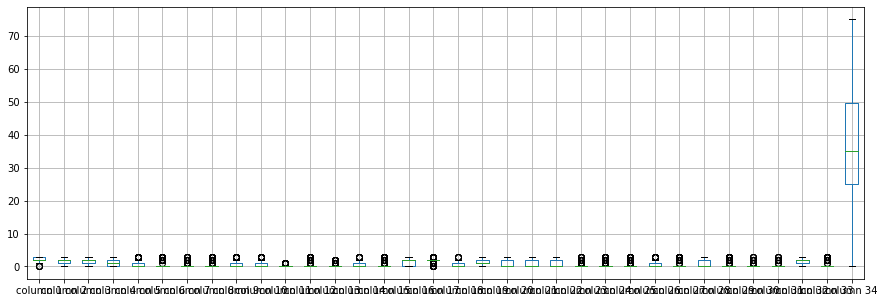

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.468647
column 7      0.167647
column 8      0.424342
column 9      0.622905
column 10     0.530726
column 11     0.122905
column 12     0.438596
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.368715
column 17     1.955307
column 18     0.511173
column 19     1.287709
column 20     0.662011
column 21     0.983240
column 22     0.644860
column 23     0.298883
column 24     0.368715
column 25     0.421053
column 26     0.474860
column 27     0.485149
column 28     0.949721
column 29     0.487719
column 30     0.111801
column 31     0.115512
column 32     1.877095
column 33     0.570957
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.018900,-0.117656,-0.019630,0.138519,0.180740,...,-0.020810,0.153229,0.009347,0.038837,-0.009468,-0.005665,-0.007591,0.093026,-0.018504,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.114764,-0.094764,-0.097040,0.294258,0.295932,...,-0.119546,0.205046,-0.141634,0.023095,-0.153557,-0.017229,-0.031032,-0.008453,-0.158378,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.320329,-0.165249,0.301766,0.301187,0.261495,...,0.286632,0.350007,0.290263,-0.252643,0.263480,-0.082977,-0.162522,0.124812,0.277026,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.402726,-0.140588,0.362911,-0.296824,-0.152562,...,0.369018,-0.190548,0.380631,0.003028,0.382617,-0.180535,-0.164137,0.051553,0.401093,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.400780,-0.171214,0.422939,-0.065438,0.013496,...,0.411236,0.002588,0.379377,0.006726,0.396968,-0.147964,-0.162000,0.110295,0.391597,0.081162
column 6,0.018900,-0.114764,0.320329,0.402726,0.400780,1.000000,-0.145605,0.873255,-0.304563,-0.268435,...,0.884928,-0.131290,0.918872,0.094431,0.896547,-0.098260,-0.112135,0.294564,0.906653,0.063418
column 7,-0.117656,-0.094764,-0.165249,-0.140588,-0.171214,-0.145605,1.000000,-0.142509,0.211100,-0.027366,...,-0.121549,-0.161514,-0.144242,-0.009024,-0.146687,0.794068,0.843749,-0.076781,-0.147103,-0.359143
column 8,-0.019630,-0.097040,0.301766,0.362911,0.422939,0.873255,-0.142509,1.000000,-0.295479,-0.274244,...,0.892718,-0.104575,0.877854,0.149658,0.875369,-0.090275,-0.107650,0.300823,0.890122,0.099363
column 9,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.304563,0.211100,-0.295479,1.000000,0.659286,...,-0.297538,0.480594,-0.288967,-0.417851,-0.309979,0.246553,0.265178,-0.079246,-0.305631,-0.078267
column 10,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.268435,-0.027366,-0.274244,0.659286,1.000000,...,-0.272421,0.485260,-0.266646,-0.425421,-0.274040,-0.064245,-0.009227,0.027887,-0.267747,0.036412


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+45,34+45+45,34+45+45+45,34+45+45+45+45,34+45+45+45+45+45,34+45+45+45+45+45+45,34+45+45+45+45+45+45+45,34+45+45+45+45+45+45,34+45+45+45+45+45,34+45+45+45+45,34+45+45+45,34+45+45,34+45,34], vae_layer = False, seed = 45)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 75.47184441306375
Epoch: 1 , loss: 75.13779796253552
Epoch: 2 , loss: 74.9378610090776
Epoch: 3 , loss: 75.40169247713956
Epoch: 4 , loss: 74.56270183216442
Epoch: 5 , loss: 73.16389950838956
Epoch: 6 , loss: 69.80954360961914
Epoch: 7 , loss: 68.52801843123002
Epoch: 8 , loss: 67.7963797829368
Epoch: 9 , loss: 67.67277058688077
Epoch: 10 , loss: 66.56075529618697
Epoch: 11 , loss: 66.29092597961426
Epoch: 12 , loss: 65.84064882451838
Epoch: 13 , loss: 65.77258578213778
Epoch: 14 , loss: 65.47484241832386
Epoch: 15 , loss: 64.94144075567073
Epoch: 16 , loss: 65.14596453579989
Epoch: 17 , loss: 65.07548176158558
Epoch: 18 , loss: 64.53227979486638
Epoch: 19 , loss: 64.42289889942516
Epoch: 20 , loss: 63.9795426455411
Epoch: 21 , loss: 63.75090633739125
Epoch: 22 , loss: 63.86654194918546
Epoch: 23 , loss: 63.43985020030629
Epoch: 24 , loss: 63.390668175437234
Epoch: 25 , loss: 63.04503128745339
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      0.057041
column 8      0.332156
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.411466
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.326798
column 26     0.000000
column 27     0.374271
column 28     0.000000
column 29     0.461841
column 30    -0.013742
column 31     1.000000
column 32     1.000000
column 33     0.544620
column 34    12.000000
Name: 21, dtype: float64

In [21]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [22]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,0.000000,0
1,0,0,0,0,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,0.000000,0
2,0,0,0,0,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,0.000000,0
3,0,0,0,0,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,0.000000,0
4,0,0,0,0,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,0.000000,0
354,0,0,0,0,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,0.000000,0
355,0,0,0,0,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,0.000000,0
356,0,0,0,0,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,0.000000,0


Calculating NRMSE Value

In [23]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [24]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [25]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(20.257859569250556, 758.0725558942231)

In [26]:
NRMS=numerator/denominator
NRMS


0.02672285048672467

In [27]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [28]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.000000,0.0,0.0,2,2,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,0,2.000000,0
1,1,1,2,0,0,0.000000,3.0,0.0,3,0,...,0.000000,0,0.000000,0,0.000000,2.0,2.000000,2,0.000000,7
2,2,2,1,0,0,0.000000,3.0,0.0,2,0,...,0.000000,0,0.000000,2,0.000000,3.0,3.000000,2,0.000000,7
3,2,2,2,1,0,0.000000,2.0,0.0,2,2,...,0.000000,0,0.000000,2,0.000000,2.0,2.000000,2,0.000000,7
4,2,2,1,0,0,0.000000,2.0,0.0,2,0,...,0.000000,0,0.000000,3,0.000000,2.0,2.000000,2,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,3,0.000000,0.0,0.000000,3,0.000000,70
354,2,3,2,0,0,0.000000,0.0,0.0,3,2,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,1,0.000000,70
355,2,2,2,1,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,2,0.000000,0.0,0.000000,2,0.000000,70
356,2,1,0,3,0,0.000000,0.0,0.0,0,0,...,0.000000,0,0.000000,0,0.000000,0.0,0.000000,1,0.000000,70


In [29]:
imputations[-1].to_excel("DERM_AG_5(imp).xlsx", index=False, header=False)